https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_csv('input/train.csv')

In [3]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. analysing 'SalePrice'

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

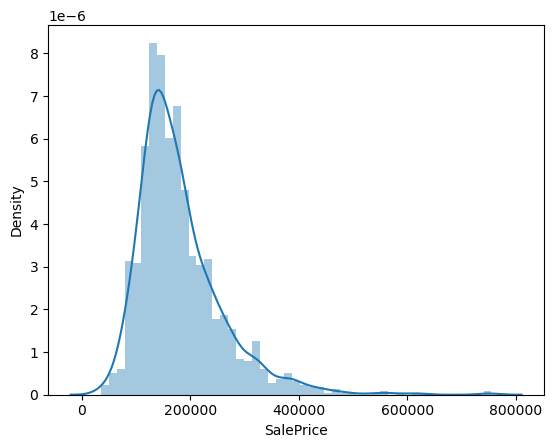

In [5]:

#histogram
sns.distplot(df_train['SalePrice']);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

# 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!*

*To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

### Relationship with numerical variables

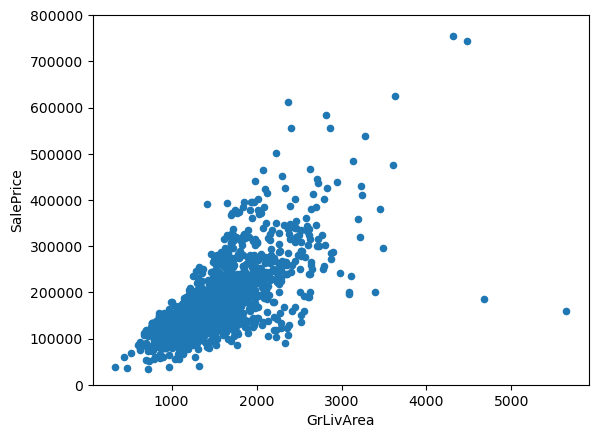

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a <b>linear relationship.</b>*

*And what about 'TotalBsmtSF'?*

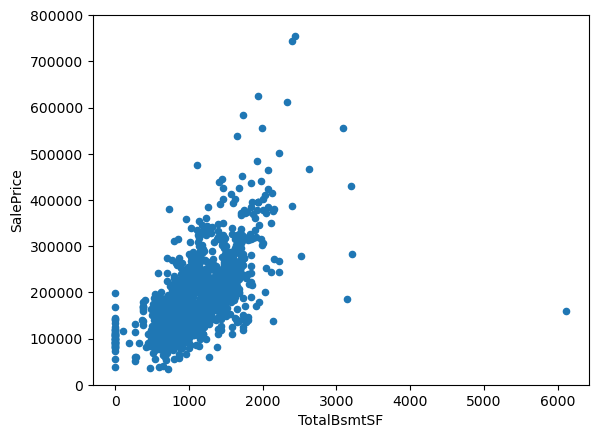

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a <b>strong linear (exponential?)</b> reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

### Relationship with categorical features

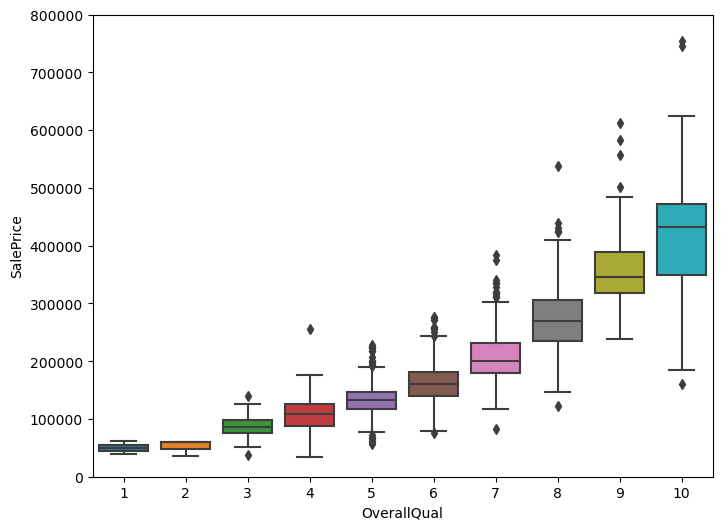

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

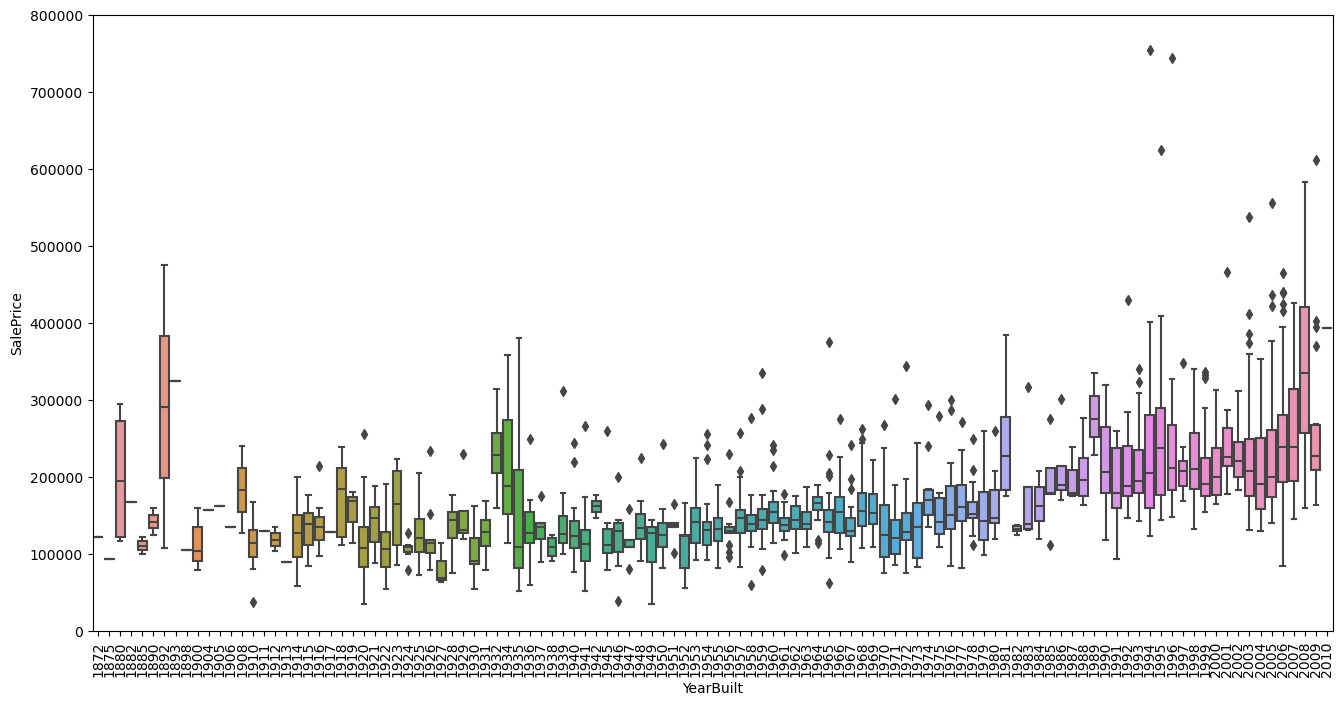

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

<b>Note</b>: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

### In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

# 3. Keep calm and work smart

### The 'plasma soup'

'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm) 

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

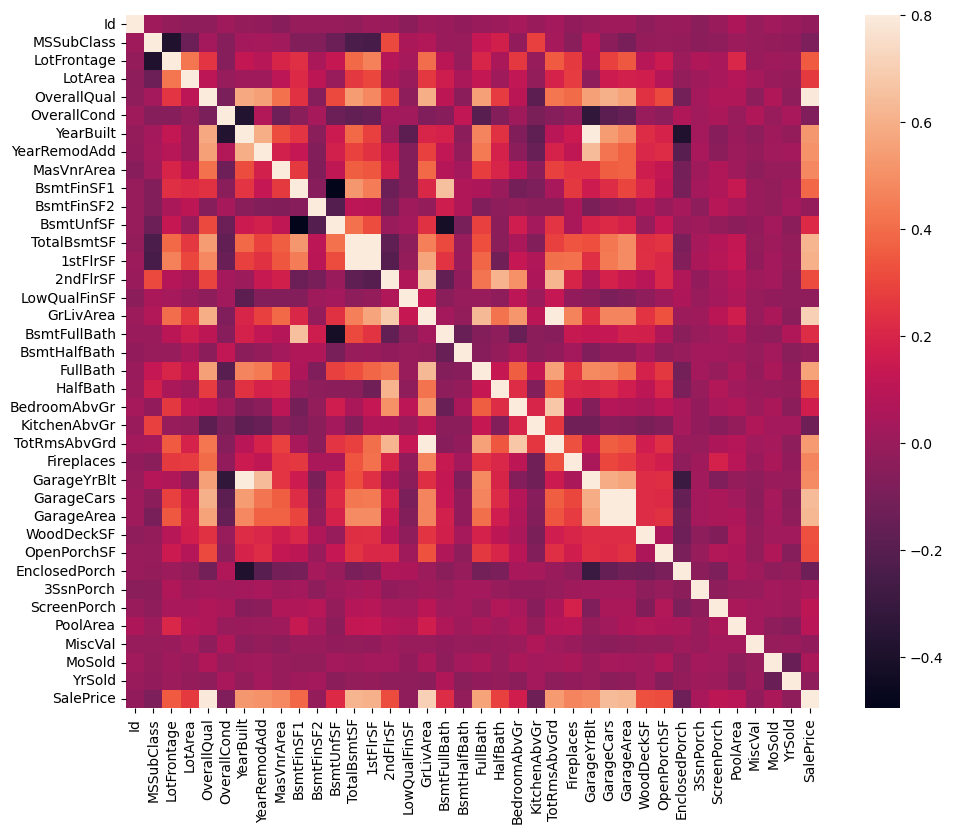

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

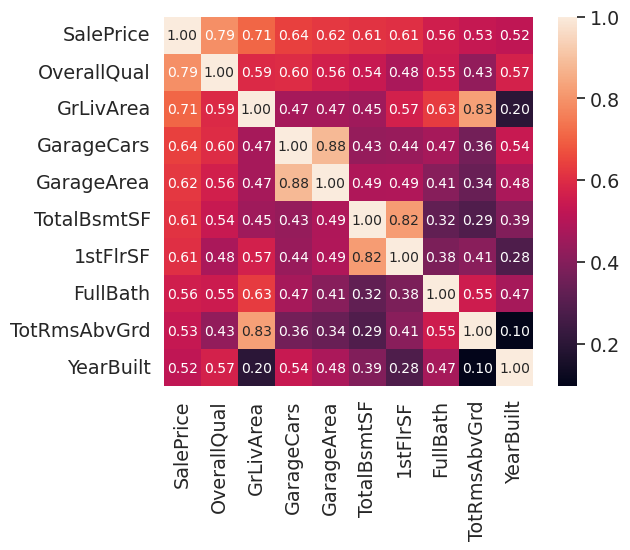

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

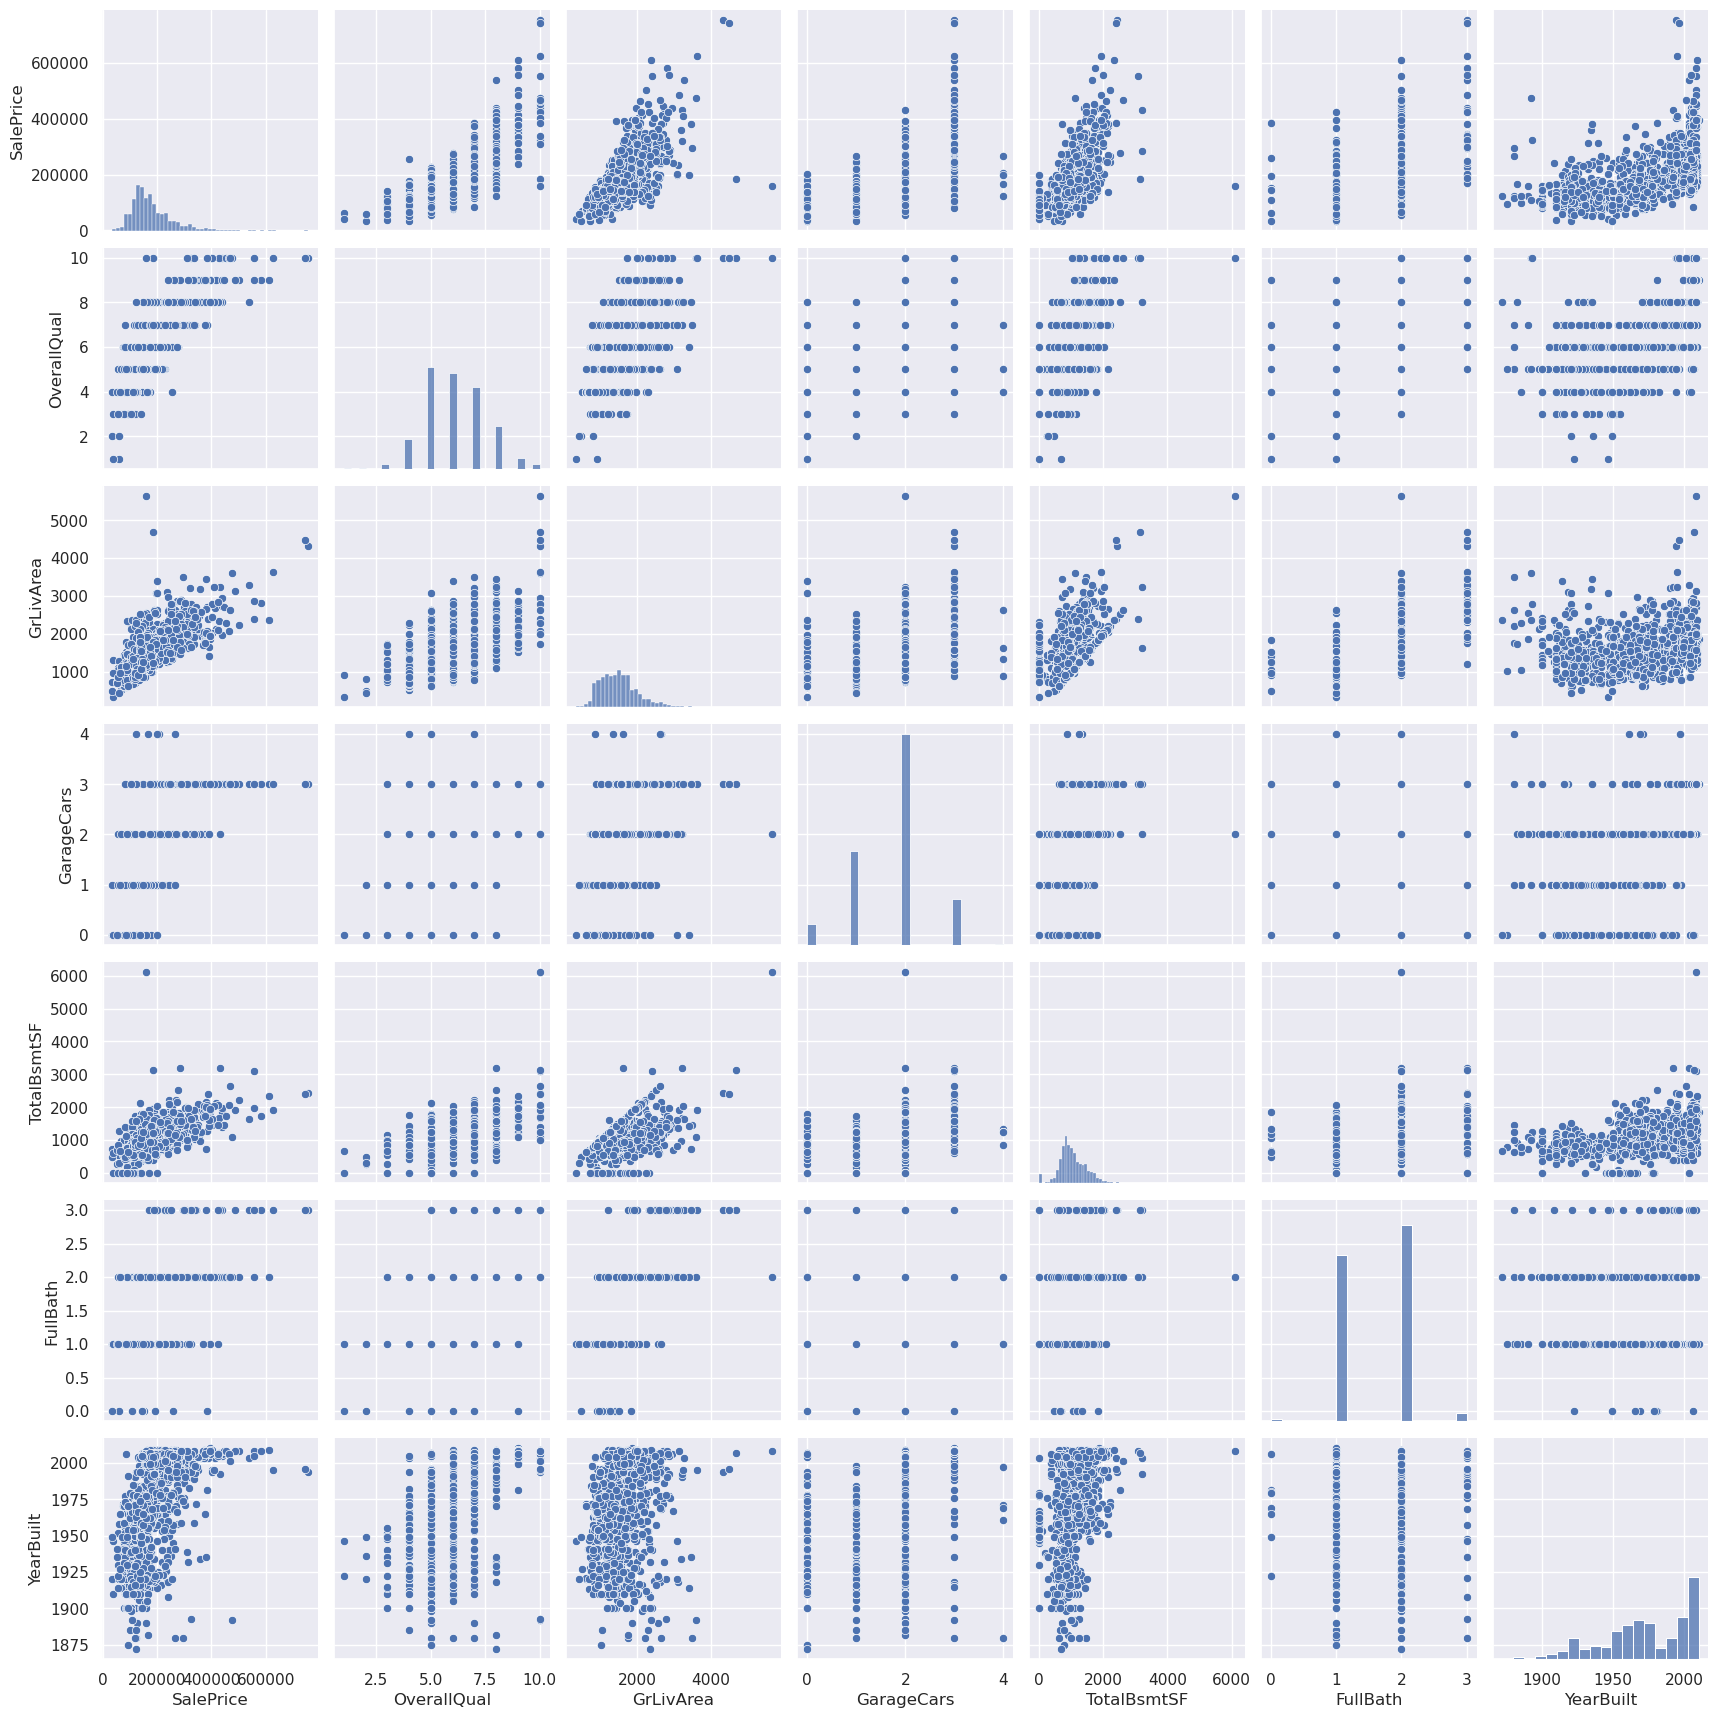

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!